# MULTIMEDIA 
## PROJECT 1: Image Compression
### B.Sc. in Informatics Engineering, FCTUC

Authors: 
 - André Carvalho, no. 2019216156
 - Paulo Cortesão, no. 2019216517

In [45]:
# package installation
# ! pip install tabulate
# ! pip3 install opencv-python

In [46]:
# code imports
import matplotlib
import os
from scipy.fftpack import dct, idct
import math
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.colors as clr
import numpy as np
import cv2
from tabulate import tabulate

In [47]:
#exercise 1: image compression testing
def ex1():
    images= ['barn_mountains' ,'logo','peppers']
    qualities = [75,50,25]
    rates=[]
    for s in images:
        img = Image.open(f"imagens/{s}.bmp")
        rgb_img = img.convert('RGB')
        arr=[s]
        original_size = os.path.getsize(f"imagens/{s}.bmp")
        plt.figure()
        plt.title(f'{s}.bmp')
        plt.imshow(img)
        for q in qualities:
            rgb_img.save(f"ex1/{s}_{q}.jpeg", quality=q)
            im2 = Image.open(f"ex1/{s}_{q}.jpeg")
            plt.figure()
            plt.title(f'{s}_{q}.jpeg')
            plt.imshow(im2)
            compressed_size = os.path.getsize(f"ex1/{s}_{q}.jpeg")
            comp_rate = "%.1f:1" %(original_size/compressed_size)
            arr.append(comp_rate)
        rates.append(arr)

    # print(46*"_")
    print(tabulate(rates, headers = ['Image\\Quality',"75%","50%","25%"] ))
            # print(f"{s} with quality {q}: compression rate {comp_rate}%")

Image\Quality    75%     50%     25%
---------------  ------  ------  ------
barn_mountains   12.5:1  19.1:1  29.8:1
logo             53.8:1  66.6:1  81.3:1
peppers          25.1:1  37.6:1  55.9:1


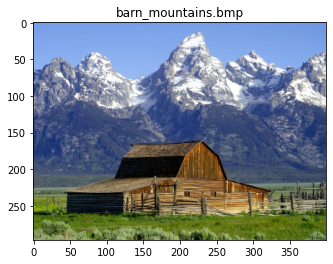

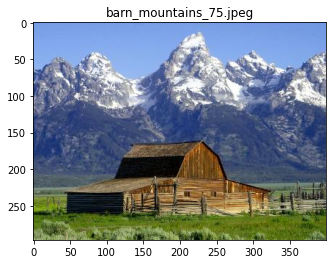

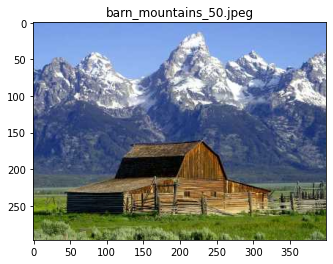

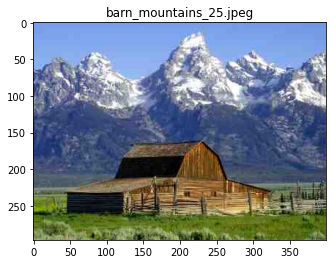

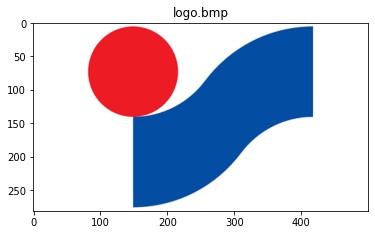

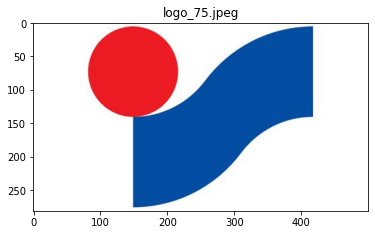

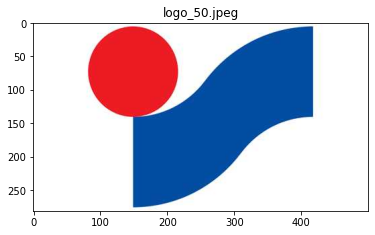

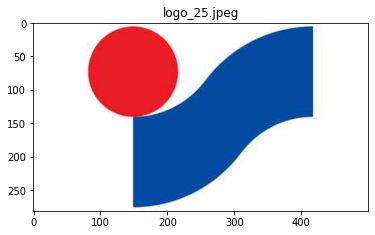

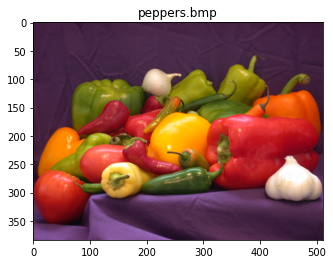

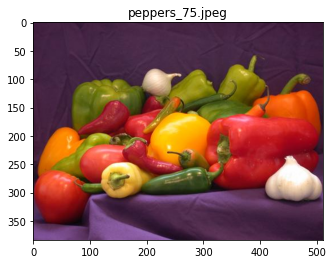

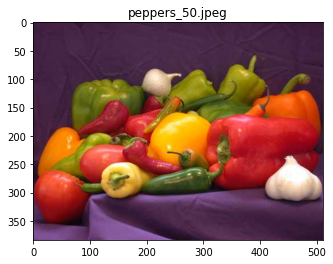

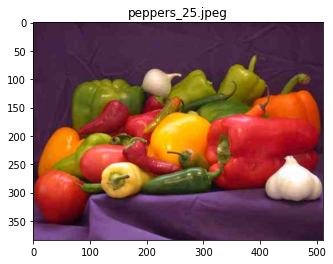

In [48]:
ex1()

# Results
### barn_mountain.jpeg image

As the quality goes down, there is a somewhat perceptible decrease in detail, especially in zones of the image where there is alternance between light and dark colour within a short range of pixels. This can be explained by the smoothing that is undertaken in JPEG.

Also because of this phenomenon, the contours that the image might have are made less crisp, and some interference between different colours of the respective areas is also verified. This is especcially evident when comparing the original bmp file to the compressed files (mountain-sky interfaces).

### peppers.jpeg image

As is expected, there is also a decrease in detail in this image, as quality decreases. The contours of each vegetable are also affected, but in this case, the smoothing also affects the perceived light reflection coming from the vegetables in general. 

### logo.jpeg image

In this image, which only contains 3 colours, the loss in detail and interference in the various contours is the most evident feature, when analysing different qualities. However, the colour representation within the objects' borders remains accurate, as there is only one colour being represented.

### General Conclusions

Overall, the most apparent quality losses can be noticed in contours and in zones with sharp colour transitions. However, if we consider the compression rates achieved by this format, the storage required is well exploited to represent the images with maximum detail. 

It was also verified that the image with the least features (logo.bmp) had the highest compression rate (81.3:1, 25% quality), whereas the image with most details (barn_mountain.bmp) had the lowest one (29.8:1, 25% quality). This leads to the conclusion that detail makes an image harder to compress.

In [49]:

# 3.2 -used-defined colormap
def color_map(color_map_name, min_color=(0,0,0), max_color = (1,1,1)) :
    return clr.LinearSegmentedColormap.from_list(color_map_name, [min_color,max_color], 256) 
 
# 3.3 -image visualization with colormap
def view_image(img, color_map,title="<untitled>"):
    plt.figure()
    plt.title(title)
    plt.imshow(img, color_map)
    plt.show(block=False)

#3.4 - channel separation and union
def separate_3channels(image):
    return (image[:,:,0], image[:,:,1], image[:,:,2])

def join_3channels(r,g,b):
    return  np.dstack((r,g,b))

def ex3():
    #3.1 - reading barn_mountains.bmp
    img_bm = plt.imread("imagens/barn_mountains.bmp")

    #3.5 - channel visualization
    r,g,b = separate_3channels(img_bm)
    cmRed = color_map('myRed', (0,0,0),(1,0,0))
    cmGreen = color_map('myGreen', (0,0,0),(0,1,0) )
    cmBlue = color_map( 'myBlue', (0,0,0),(0,0,1))

    d = {'red':cmRed, 'green': cmGreen, 'blue': cmBlue }
    e = {'red': r, 'green':g, 'blue':b}
    for col in d.keys():
        view_image(e[col],d[col], col)
    return img_bm

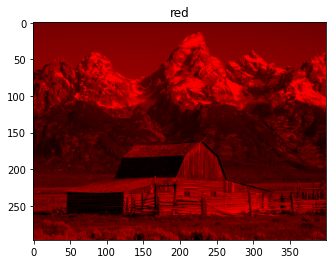

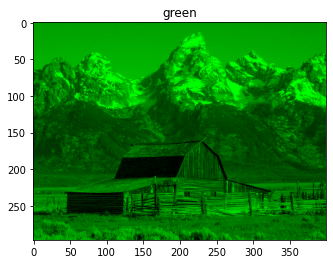

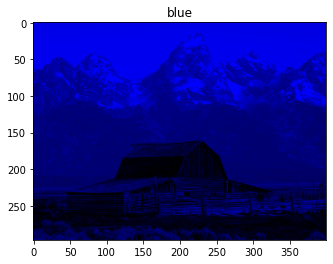

In [50]:
img_bm = ex3()

In [51]:
#4 - Padding pre-processing
#Receives a 3D array (all 3 channels)
def image_padding(img):
    sh = or_shape = img.shape
    last_line = img[len(img)-1,:,:]
    if (len(img)%16!=0):   
        arr_to_add = np.tile(last_line, (16-len(img)%16,1)).reshape(16-len(img)%16,or_shape[1],3)
        img = np.vstack((img, arr_to_add))

    last_col = np.array([img[:, len(img[0])-1, :]])
    sh= img.shape
    if(sh[1]%16!=0):
        arr_to_add = np.tile(last_col, (1,16-sh[1]%16)).reshape(sh[0], 16-sh[1]%16,3)
        img = np.hstack((img, arr_to_add))

    return img, or_shape

def image_remove_padding(img, shape):
    h,c = shape[0], shape[1]
    return img[:h,:c,:]

def ex4():
    print("Original image shape: ",img_bm.shape)
    img_bm_padded, original_shape = image_padding(img_bm)
    print("Padded image shape: ",img_bm_padded.shape)
    img_bm_no_padding = image_remove_padding(img_bm_padded, original_shape)
    print("Image with padding removed shape: ",img_bm_no_padding.shape)
    print("Removal correct? " , np.array_equal(img_bm_no_padding, img_bm))
    return img_bm_padded

In [52]:
img_bm_padded = ex4()

Original image shape:  (297, 400, 3)
Padded image shape:  (304, 400, 3)
Image with padding removed shape:  (297, 400, 3)
Removal correct?  True


In [53]:
#5 - conversion to the YCbCr model

RGB2YCBCR=np.array([[0.299,0.587,0.114],[-0.168736, -0.331264, 0.5],[0.5, -0.418688, -0.081312]])
YCBCR2RGB=np.linalg.inv(RGB2YCBCR)
min_cb = (0.5,0.5,0)
max_cb = (0.5,0.5,1)
min_cr = (0,0.5,0.5)
max_cr = (1,0.5,0.5)
cmGray = color_map('myGray', (0,0,0),(1,1,1) )
cmChromBlue = color_map('myCb', tuple(min_cb),  tuple(max_cb) )
cmChromRed = color_map('myCr', tuple(min_cr),  tuple(max_cr) )

def rbg2ycbcr(img):
    ycc= img.dot(RGB2YCBCR.T)
    ycc[:,:,1:3] += 128
    return ycc

def ycbcr2rgb(img):+
    
    img[:,:,1:3] -= 128
    recovered = img.dot(YCBCR2RGB.T)
    recovered[recovered < 0]=0
    recovered[recovered > 255]=255
    recovered= np.round(recovered)
    return recovered.astype(np.uint8)

def ex5():
    chromin_image = rbg2ycbcr(img_bm_padded)
    y, cb,cr = separate_3channels(chromin_image)

    d = {'gray': cmGray,  'chromBlue':cmChromBlue, 'chromRed':cmChromRed }
    e = {'gray': y, 'chromBlue':cb, 'chromRed':cr}
    for col in d.keys():
        view_image(e[col],d[col],col)
    return y,cb,cr


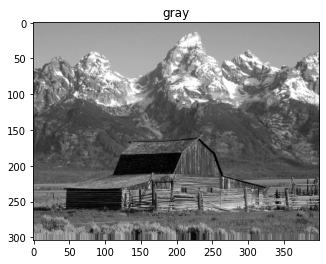

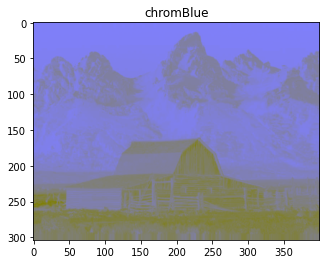

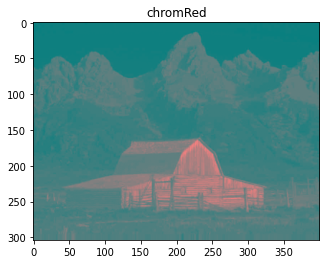

In [54]:
y,cb,cr = ex5()

### 5.4 Image comparison

From the analysis of the images generated, it is clear that while there is a good deal of detail in all the RGB channels, only in the Y channel of the YCbCr encoding is there comparable definition (very similar to the one that occurs in the G channel, which represents the colour the human eye is most sensitive to).  As well as this, a significant positive correlation between the values in the RGB channels makes this format bear some redundancy, as can be seen in the several light or dark colours present in the image. Because of this, using YCbCr allows for a greater compression potential, as that redundancy is essentially concentrated in just one channel, while the chrominance, less perceptible to the human eye, is distributed among the remaining two channels (Cb and Cr), which can be destructively compressed later.

In [73]:
# 6 - downsampling and upsampling

def ycrcb_downsampling(y,cr,cb, comp_ratio): # comp_ratio is a tuple with 3 values, such as (4,2,2)
    cr_d=cb_d=np.array([])
    cb = cb[np.newaxis,:]
    cr = cr[np.newaxis,:]
    print(cb.shape)
    if comp_ratio[2]!= 0: #horizontal only
        cr_ratio= comp_ratio[0]//comp_ratio[1]
        cr_d = cr[:,::cr_ratio]
        cb_ratio= comp_ratio[0]//comp_ratio[2]
        cb_d = cb[:,::cb_ratio]
    else: #  horizontal and vertical
        cb_ratio=cr_ratio=comp_ratio[0]//comp_ratio[1]
        cr_d = cr[::cr_ratio,::cr_ratio]
        cb_d = cb[:: cb_ratio,::cb_ratio]
    return y, cr_d, cb_d

def ycrcb_downsampling_cv2(y,cr,cb, comp_ratio): # comp_ratio is a tuple with 3 values, such as (4,2,2)
    cr_d=cb_d=np.array([])
    sh = y.shape
    lines, columns = sh[0], sh[1]
    print(sh)
    if comp_ratio[2]!= 0: #horizontal only
        cr_ratio= comp_ratio[0]//comp_ratio[1]
        columns /= cr_ratio
        cr_d = cv2.resize(cr, None, fx = 1/cr_ratio, fy=1, interpolation = cv2.INTER_AREA )
        cb_ratio = comp_ratio[0]//comp_ratio[2]
        columns = sh[1]//cb_ratio
        cb_d = cv2.resize(cb, None, fx = 1/cb_ratio, fy=1, interpolation = cv2.INTER_AREA )

    else: #  horizontal and vertical
        cb_ratio=cr_ratio=comp_ratio[0]//comp_ratio[1]
        lines /= cr_ratio
        columns /= cr_ratio
        cr_d = cv2.resize(cr, None, fx = 1/cr_ratio, fy=1/cr_ratio, interpolation = cv2.INTER_AREA )
        cb_d = cv2.resize(cb, None, fx = 1/cb_ratio, fy=1/cb_ratio, interpolation = cv2.INTER_AREA )
    return y, cr_d, cb_d

def ycrcb_upsampling_cv2(y,cr,cb, comp_ratio): # comp_ratio is a tuple with 3 values, such as (4,2,2)
    cr_u=cb_u=np.array([])
    sh = y.shape
    lines, columns = sh[0], sh[1]
    cr_lines, cr_columns = cr.shape
    cb_lines, cb_columns = cb.shape
    cr_u = cv2.resize(cr_d, None, fx = columns/cr_columns, fy=lines/cr_lines, interpolation = cv2.INTER_AREA )
    cb_u = cv2.resize(cb_d, None, fx = columns/cb_columns, fy=lines/cb_lines, interpolation = cv2.INTER_AREA )
    return y, cr_u, cb_u

def ycrcb_upsampling(y_d:np.array,cr_d:np.array, cb_d:np.array, comp_ratio: tuple)-> np.array:
    cb_shape= cb_d.shape
    cr_shape= cr_d.shape
    cr=cb=np.array([])
    if comp_ratio[2]!= 0: # horizontal only
        cr_ratio= comp_ratio[0]//comp_ratio[1]
        cb_ratio= comp_ratio[0]//comp_ratio[2]

        cb= np.repeat(cb_d, cb_ratio).reshape(cb_shape[0], cb_shape[1]*cb_ratio)
        cr= np.repeat(cr_d, cr_ratio).reshape(cr_shape[0], cr_shape[1]*cr_ratio)

    else: # horizontal and vertical
        cb_ratio = cr_ratio = comp_ratio[0]//comp_ratio[1]

        cb= np.repeat(cb_d, cb_ratio).reshape(cb_shape[0], cb_shape[1]*cb_ratio)
        cb_shape= cb.shape
        cb= np.repeat(cb.T, cb_ratio).reshape(cb_shape[1], cb_shape[0]*cb_ratio).T
        
        cr= np.repeat(cr_d, cr_ratio).reshape(cr_shape[0], cr_shape[1]*cr_ratio)
        cr_shape= cr.shape
        cr= np.repeat(cr.T, cr_ratio).reshape(cr_shape[1], cr_shape[0]*cr_ratio).T
    return y_d, cr,cb

def ex6():
    ds_ratio = (4,2,0)
    (y_d,cr_d,cb_d) = ycrcb_downsampling_cv2(y,cr,cb, ds_ratio)
    d = {'gray': cmGray,  'chromBlue':cmChromBlue, 'chromRed':cmChromRed }
    e = {'gray': y_d, 'chromBlue':cb_d, 'chromRed':cr_d}

    for col in d.keys():
        view_image(e[col],d[col],"%s with shape %s"%(col,e[col].shape))
    (y_u,cr_u,cb_u) = ycrcb_upsampling_cv2(y_d,cr_d,cb_d, ds_ratio)
        
    return y_d, cb_d, cr_d


(304, 400)


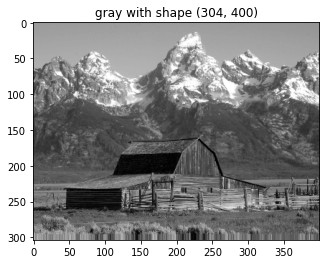

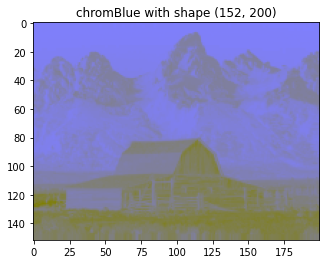

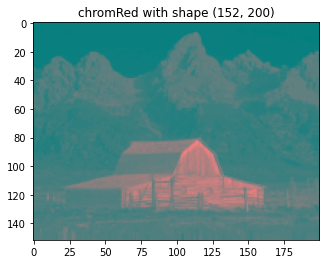

In [74]:
y_d, cb_d, cr_d = ex6()

### 6.3 Analysis of the compression obtained from the downsampling



In the 4:2:2 downsampling scheme, both chrominance channels are downsampled to their half horizontally, which constitutes a 50% compression in those channels; while the Y channel remains unaffected. Because of this, the compression achieved is $1-(\frac{\frac{1}{2} + \frac{1}{2} + 1}{3})  = \frac{1}{3} $, or around 33.3%. 

On the other hand, in the 4:2:0 downsampling scheme, both chrominance channels are downsampled to their half horizontally and vertically, which makes them be reduced to only a fourth of the inicial storage; while the Y channel remains unaffected as well. This result in a final compression of $1-(\frac{\frac{1}{4} + \frac{1}{4} + 1}{3})  = \frac{1}{2} $, or 50%.

Given that the destructivity rate is the same as the compression rate, in this destructive scheme, it can be inferred that the latter method is more destructive than the former. The data that is no longer represented cannot be recovered with exatitude, in the posterior upsampling fase.

In [57]:
#7 - DCT
def dct_channel(channel):
    return dct(dct(channel, norm="ortho").T, norm='ortho').T

def idct_channel(dct_channel_arr):
    return idct(idct(dct_channel_arr, norm="ortho").T, norm="ortho").T

def ex7():
    dct_y = dct_channel(y_d)
    dct_cb = dct_channel(cb_d)
    dct_cr = dct_channel(cr_d)
    dcts= {"y":dct_y,"cb":dct_cb,"cr":dct_cr}
    idct_y = idct_channel(dct_y)
    idct_cb = idct_channel(dct_cb)
    idct_cr = idct_channel(dct_cr)
    idcts = {"y":idct_y,"cb":idct_cb,"cr":idct_cr}
    for name, channel in dcts.items():
        fig = plt.figure()
        # plt.title(f"{name} dct - log(2*x/sqrt(M*N)+0.0001)")
        channel_size =channel.shape[0] * channel.shape[1]
        # sh = plt.imshow(np.log(np.abs(2*channel/math.sqrt(channel_size)) + 0.0001))
        plt.title(f"{name} dct - log(abs(x)+0.0001)")
        sh = plt.imshow(np.log(np.abs(channel) + 0.0001))
        fig.colorbar(sh)
        plt.show(block=False)

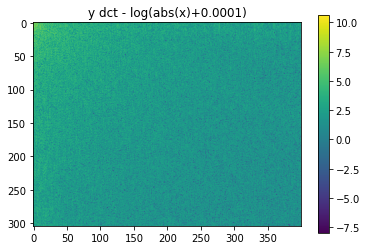

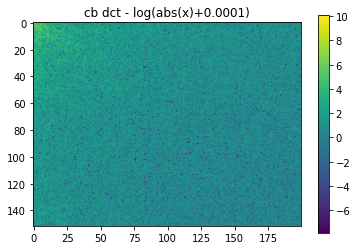

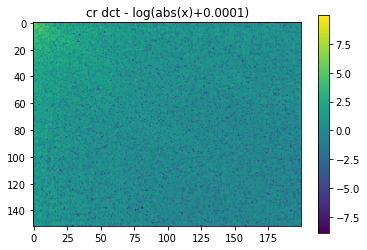

In [58]:
ex7()

### 7.1.3 

In [59]:
def encode(img_name, ds_rate: tuple) -> None:
    img= plt.imread(img_name)
    # plt.figure()
    # plt.imshow(img)
    
    print(img.shape)  # dimensions
    print("image: ",img)
    #R= img[:,:,0] # red channel
    #print(R.shape) 
    print(img.dtype)  # data typr

    img_padded , original_shape = image_padding(img)

    cmRed = color_map('myRed', (0,0,0),(1,0,0))
    cmGreen = color_map('myGreen', (0,0,0),(0,1,0) )
    cmBlue = color_map( 'myBlue', (0,0,0),(0,0,1))
    cmGray = color_map('myGray', (0,0,0),(1,1,1) )
    
    min_cb = (0.5,0.5,0)
    max_cb = (0.5,0.5,1)
    min_cr = (0,0.5,0.5)
    max_cr = (1,0.5,0.5)
    cmChromBlue = color_map('myCb', tuple(min_cb),  tuple(max_cb) )
    cmChromRed = color_map('myCr', tuple(min_cr),  tuple(max_cr) )
    r,g,b = separate_3channels(img_padded)
    chromin_image = rbg2ycbcr(img_padded)
    y, cb,cr = separate_3channels(chromin_image)

    d = {'red':cmRed, 'green': cmGreen, 'blue': cmBlue, 'gray': cmGray,  'chromBlue':cmChromBlue, 'chromRed':cmChromRed }
    e = {'red': r, 'green':g, 'blue':b, 'gray': y, 'chromBlue':cb, 'chromRed':cr}
    # for col in d.keys():
    #     view_image(e[col],d[col])
    print("coisas a acontecer aqui")

    # ds_rate = (4,2,0)
    (y_d,cr_d,cb_d) = ycrcb_downsampling(y,cr,cb, ds_rate)


    
    
    d = {'gray': cmGray, 'chromBlue':cmGray, 'chromRed':cmGray }
    e = { 'gray': y, 'chromBlue':cr_d, 'chromRed':cb_d}

    for col in d.keys():
        view_image(e[col],d[col])

    # return chromin_image, original_shape
    dct_y = dct_channel(y_d)
    dct_cb = dct_channel(cb_d)
    dct_cr = dct_channel(cr_d)
    dcts= {"y":dct_y,"cb":dct_cb,"cr":dct_cr}
    # for name, channel in dcts.items():
    #     fig = plt.figure()
    #     plt.title(f"{name} dct - log(x+0.0001)")
    #     # cax = plt.axes()
    #     # a = np.linspace(np.min(channel),np.max(channel),6)
    #     sh = plt.imshow(np.log(np.abs(channel) + 0.0001))
    #     fig.colorbar(sh)
    #     plt.show(block=False)
       
    return dct_y,dct_cb,dct_cr, original_shape


In [60]:
def decode(dct_y,dct_cb,dct_cr, ds_ratio, original_shape):
    y_d = idct_channel(dct_y) 
    cb_d = idct_channel(dct_cb) 
    cr_d = idct_channel(dct_cr) 
    dcts= {"y":y_d,"cb":cb_d,"cr":cr_d}
    min_cb = (0.5,0.5,0)
    max_cb = (0.5,0.5,1)
    min_cr = (0,0.5,0.5)
    max_cr = (1,0.5,0.5)
    cmGray = color_map('myGray', (0,0,0),(1,1,1) )
    cmChromBlue = color_map('myCb', tuple(min_cb),  tuple(max_cb) )
    cmChromRed = color_map('myCr', tuple(min_cr),  tuple(max_cr) )
    for name, channel in dcts.items():
        fig = plt.figure()
        plt.title(f"{name} downslampled restored")
        # cax = plt.axes()
        # a = np.linspace(np.min(channel),np.max(channel),6)
        plt.imshow(channel, cmGray)

        plt.show(block=False)
    
    y_u,cr_u, cb_u = ycrcb_upsampling(y_d,cr_d, cb_d, ds_ratio)
    print("cr_u.shape= ",cr_u.shape)
    print("cb_u.shape= ",cb_u.shape)
    d = {'chromBlue':cmChromBlue, 'chromRed':cmChromRed }
    e = {'chromBlue':cb_d, 'chromRed':cr_d}
    # for col in d.keys():
    #     view_image(e[col],d[col])
    d = {'gray': cmGray, 'chromBlue':cmChromBlue, 'chromRed':cmChromRed }
    e = { 'gray': y_u, 'chromBlue':cb_u, 'chromRed':cr_u}
    # for col in d.keys():
    #     view_image(e[col],d[col])
    encoded= join_3channels(y_u,cb_u,cr_u)

    inverse_chromin = ycbcr2rgb(encoded)
    plt.figure()
    plt.title('depois de ycbcr e da inversão')
    plt.imshow(inverse_chromin)
    plt.show(block=False)

    img = image_remove_padding(inverse_chromin, original_shape)
    plt.figure()
    plt.title('sem padding')
    plt.imshow(img)
    plt.show(block=False)

    return img
